In [1]:
import xgboost
import random
from xgboost import plot_tree

In [2]:
train_size = 10000
test_size = 1000
dimension = 5

In [3]:
def get_x():
  x = [random.uniform(-1,1) for i in range(dimension)]

  if x[3] >0.5:
    x+=[1,0,0]
  elif x[3]<-0.5:
    x+=[0,1,0]
  else:
    x+=[0,0,1]

  return x

In [4]:
get_x

<function __main__.get_x()>

In [5]:
print(get_x())

[-0.6550715624091608, 0.44521112264925744, 0.8819761563315165, 0.633605747997835, 0.38713565144911466, 1, 0, 0]


In [6]:
abs(-1)

1

In [7]:
def get_y(x):
  y = x[0]**2 + abs(x[1])**0.5+2*x[2]**3
  return y

In [8]:
x = get_x()

In [9]:
print(get_y(x))

1.7337692819701485


In [10]:
model = xgboost.XGBRegressor(n_estimators = 3, max_depth = 2)

In [11]:
X_train = []
Y_train = []

for i in range(train_size):
  x = get_x()
  y = get_y(x)
  print('x',x, 'y',y)
  X_train.append(x)
  Y_train.append(y)

Streaming output truncated to the last 5000 lines.
x [-0.5447335231214889, 0.25461239195939034, 0.715876548300814, -0.7326882463548405, 0.3853394493262934, 0, 1, 0] y 1.535069650970429
x [0.7420368931545422, -0.09802293221563962, -0.6266220297637066, 0.49902830577798696, -0.7652350397059116, 0, 0, 1] y 0.3716121356770245
x [0.1242884517759002, 0.8643188124795791, 0.6156250798923837, 0.07057600046209034, -0.7115148261387678, 0, 0, 1] y 1.4117718176433312
x [-0.026227242975244813, -0.5681964940053659, -0.18229656119589088, 0.5415619528053841, -0.43883031833777775, 1, 0, 0] y 0.7423597926453812
x [-0.8396899048904871, 0.5583417892181497, 0.95836185857948, -0.4916867989063298, 0.13337869842042815, 0, 0, 1] y 3.212731035065511
x [-0.5067817446943881, 0.30575777669938753, 0.039513699666738455, -0.8934383589243478, 0.5813604708909501, 0, 1, 0] y 0.8099048088448103
x [-0.4637482334968701, -0.4953301817355107, -0.46679200285071687, 0.9774750384521622, -0.4644810466725038, 1, 0, 0] y 0.715436323

In [12]:
Y_train

[1.9333727363439723,
 0.669168759737457,
 1.2225042391840724,
 -0.20891047188858924,
 1.1101565194117125,
 1.0194236570829376,
 1.0726361058453626,
 0.9546495847537833,
 1.4989134247717797,
 0.8345498074660952,
 -1.5005053018441423,
 0.7611051753347451,
 1.2092264469438796,
 1.0363584476011527,
 0.7650942567113944,
 1.525355264107569,
 1.394764099156123,
 1.3135571815272853,
 1.026734327248335,
 2.678017879074573,
 0.7643479673798735,
 0.8825038213375211,
 -0.22677513582926156,
 0.9756427082741115,
 0.9041315967842973,
 0.7685087025321848,
 0.15383446817086976,
 1.6221996847274924,
 2.1373669318216915,
 -0.5311971951326804,
 0.5136599215174944,
 0.9518618889989338,
 0.43308198771733986,
 0.9866088144264986,
 0.6187908923535492,
 1.822086350091896,
 0.7895191818297975,
 1.4316748203179084,
 0.6228545372231443,
 0.7430986221278617,
 1.617812464668438,
 0.8554950617363383,
 2.1501353771906544,
 1.2214599811143336,
 -0.01862400485686222,
 1.0724772843468695,
 0.26822387024509176,
 1.052561

In [13]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=3, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [14]:
model.save_model('model.xgb')

In [15]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [16]:
#generation of the test data and model prediction
random.seed(1)

X_test = []
Y_test = []
Y_predict = []

for i in range(test_size):
  x = get_x()
  y = get_y(x)
  print('x',x, 'y',y)
  X_test.append(x)
  Y_test.append(y)

  y_predict = model.predict([x])
  Y_predict.append(y_predict)
  print('y', y, y_predict)

  mae = mean_absolute_error(Y_test,Y_predict)
  print('mae', mae)

x [-0.7312715117751976, 0.6948674738744653, 0.5275492379532281, -0.4898619485211566, -0.009129825816118098, 0, 0, 1] y 1.661987692315782
y 1.661987692315782 [0.9326922]
mae 0.7292954625680097
x [-0.10101787042252375, 0.3031859454455259, 0.5774467022710263, -0.8122808264515302, -0.9433050469559874, 0, 1, 0] y 0.9459209216422954
y 0.9459209216422954 [0.9326922]
mae 0.3712620772312664
x [0.6715302078397394, -0.13446586418989326, 0.524560164915884, -0.9957878932977786, -0.10922561189039715, 0, 1, 0] y 1.1063281762308548
y 1.1063281762308548 [0.9326922]
mae 0.30538670031520515
x [0.44308006468156513, -0.5424755574590947, 0.8905413911078446, 0.8028549152229671, -0.9388200339328929, 1, 0, 0] y 2.345361924859831
y 2.345361924859831 [1.8327788]
mae 0.3571858035876684
x [-0.9491082780130784, 0.08282494558699316, 0.8782983255570211, -0.23759152462357513, -0.5668012057387732, 0, 0, 1] y 2.5436523767687174
y 2.5436523767687174 [1.8327788]
mae 0.4279233559329236
x [-0.15576684883456537, -0.941918424

f_importance {'f2': 1080.93701171875}


<function matplotlib.pyplot.show(close=None, block=None)>

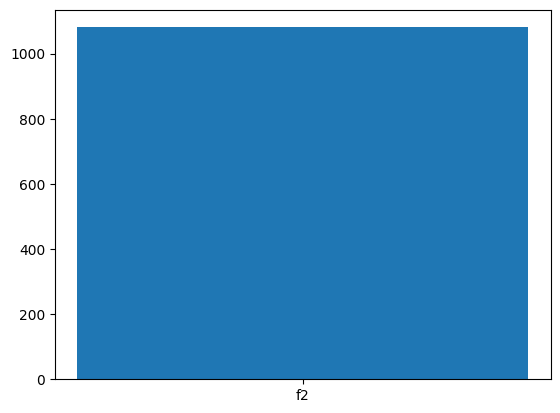

In [17]:
f_importance = model.get_booster().get_score(importance_type = 'gain')
print('f_importance', f_importance)
plt.bar(*zip(*f_importance.items()))
plt.show


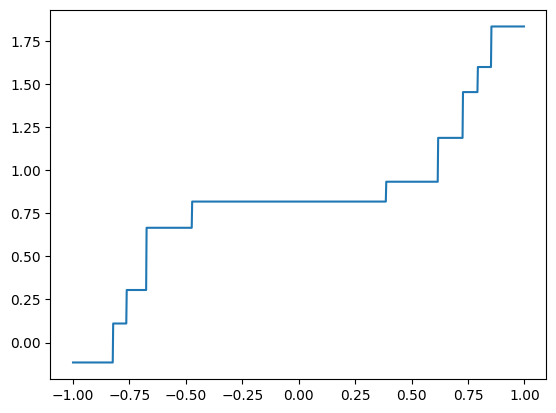

In [18]:
X = []
Y = []
for i in range(1000):
  x = get_x()
  x[2] = i/500-1
  x[0] = 0
  x[1] = 0
  y = model.predict([x])[0]
  X.append(x[2])
  Y.append(y)

plt.plot(X,Y)
plt.show()


<Figure size 3000x3000 with 0 Axes>

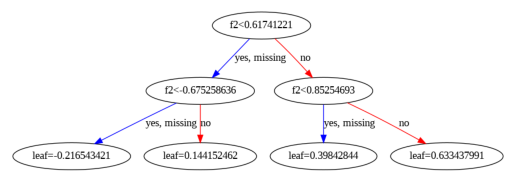

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=300)
plot_tree(model)
plt.show()